# Pandas Test - Real life Exercise

In [812]:
import pandas as pd

For visualizations:

In [775]:
%pip install plotly_express

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [817]:
import cufflinks as cf; cf.go_offline()
import plotly_express as px

## About the data

The data you are about to load is coming from an Ad recommentation system of the company InBrain. InBrain is a adTech company and specalize in next-level ad recommendation.  
The company has two major products - one giving high quality recommendation while the other is giving an highly yielding recommendation. Inbrain custormers are sending requests, asking for either of the products. 

Once a week, the company is doing an internal quality assements, and sends a sample of its traffic requests to external annotation process, in which the annotators are trained to manually decided whether the recommended Ad is a succes or not. The data contains information about the ad (**ad_id**), the sampled week (**week_id**), the requester company (**requester**), the region of operation (**region**), the recommendation type (Quality/Yield, **recommendation_type**) and the recommendation provider algorithm (**rec_provider**). The annotators are marking whether the recommendation is meeting the Quality/Yield standards (**is_success**) and whether or not the recommendation is severly defected (**is_sever**)

See a sample below:

In [818]:
ad_recs_annotated = pd.read_csv('data/Final assigment/ad_annotations.csv')
ad_recs_annotated.sample(5)

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider
38098,2021-week_35,AD08K8H8QP,VarVee,JP,no,False,Yield,DNNY
51075,2021-week_36,AD09889WS7,Search Million Culture,IN,no,False,Qality,UserPopQ
276093,2022-week_01,AD08CSP8R6,Search Million Culture,GB,yes,NaN,Qality,DNNQ
155867,2021-week_43,AD0088888F,Extreme DA,US,yes,NaN,Yield,DNNY
49451,2021-week_36,AD08HN8Q8Q,Search Million Culture,IN,yes,NaN,Qality,UserPopQ


In [819]:
most_pop_ad = ad_recs_annotated.ad_id.value_counts().idxmax()
most_pop_ad

'AD07PFFMP9'

In [820]:
q = f'ad_id == "{most_pop_ad}"'
q

'ad_id == "AD07PFFMP9"'

In [5]:
#ad_recs_annotated.query('ad_id == @most_pop_ad')

Your job, as the new and only data scientist of the company, is to get familiar with the the data, show week-over-week trends and produce insightfull graphs as a preparation to a full blown BI dashboard.

## Questions

### Data Modifications

1. Add a column with the sample year
1. Add a column with the sample quarter (google how to)
1. Add a new success column with values 1 and 0 for yes and no 
1. Are there any NaNs in the is_sever column? Count how many and create a new column with NaNs filled as False. Check that indeed the new column contaion no NaNs. 
1. Capitlize (first letter only) the is_success column (Inplace)

In [821]:
#1
def retrieve_number(text, sign, retrieve_index):
    texts = text.split(sign)
    return texts[retrieve_index]

ad_recs_annotated["year"] = [retrieve_number(item, "-",0) for item in ad_recs_annotated["week_id"]]
ad_recs_annotated["year"]

0         2021
1         2021
2         2021
3         2021
4         2021
          ... 
373783    2022
373784    2022
373785    2022
373786    2022
373787    2022
Name: year, Length: 373788, dtype: object

In [822]:
#2
def quarter_from_week(week):
    return int(week) //13

ad_recs_annotated["quarter"] = ad_recs_annotated["week_id"].apply(func = retrieve_number, args = ("_", 1)).apply(func = quarter_from_week)

In [825]:
#3
ad_recs_annotated["is_sucess_int"] = [int(item == "yes") for item in ad_recs_annotated["is_success"]]

In [914]:
#4
print(ad_recs_annotated["is_sever"].isnull().value_counts())
ad_recs_annotated["is_sever_no_nan"] = ad_recs_annotated["is_sever"].fillna("False")
print(ad_recs_annotated["is_sever_no_nan"].value_counts())
print(ad_recs_annotated["is_sever_no_nan"].isnull().value_counts())

True     304195
False     69593
Name: is_sever, dtype: int64
False    304195
True      44689
False     24904
Name: is_sever_no_nan, dtype: int64
False    373788
Name: is_sever_no_nan, dtype: int64


##### 5 Capitlize (first letter only) the is_success column (Inplace)

In [68]:
ad_recs_annotated["is_success"].str.capitalize()

0         Yes
1         Yes
2         Yes
3         Yes
4         Yes
         ... 
373783    Yes
373784    Yes
373785    Yes
373786    Yes
373787    Yes
Name: is_success, Length: 373788, dtype: object

### Subset selection

for each question, sub-select the data by using the conditional selection (`[]`) and the `.query` API. Use `.shape` on the subselection to obtain the result.  
For example:
`df.query('some_condition').shape`

1. How many requests are there in US region? 
1. How many **successful** requests are there in US region? 
1. How many **successful** requests are there in US region, on week 52?
1. How many requests where delivered by DNNQ, RNNY and UserPopQ together? 
1. How many requests where delivered by rule based providers? 
1. Select only the requests from 2021 - How many are there? 
1. Select the reqeusts from week 30 to week 40 - How many are there? 
1. Select all the data that comes from the most popular Ad
1. Select all the data that comes from the least popular provider
1. Select the data in which is_sever is None. How big is it? 
1. Select the data in which the requester is a 3 word company
1. Select the data in which the requester is a 3 word company, and the ad_id has the letter 6 in it
1. Select the data in which the requester is a 3 word company, and the multiplication of all the numbers in the ad_id is bigger than 30

###### 1. How many requests are there in US region?

In [85]:
print(ad_recs_annotated[ad_recs_annotated["region"] == "US"].shape)
ad_recs_annotated.query('region == "US"').shape

(103846, 12)


(103846, 12)

###### 2. How many **successful** requests are there in US region? 

In [96]:
print(ad_recs_annotated[(ad_recs_annotated["region"] == "US") & (ad_recs_annotated["is_success"] == "Yes")].shape)
ad_recs_annotated.query('region == "US" and is_success == "Yes"').shape

(88918, 12)


(88918, 12)

###### 3. How many **successful** requests are there in US region on week 52? 

In [151]:
#add the week column
ad_recs_annotated["week"] = ad_recs_annotated["week_id"].apply(func = retrieve_number, args = ("_", 1)).apply(func = int)
print(ad_recs_annotated[(ad_recs_annotated["region"] == "US") & (ad_recs_annotated["is_success"] == "Yes") & (ad_recs_annotated["week"] == 52)].shape)
ad_recs_annotated.query('region == "US" and is_success == "Yes" and week==52').shape

(3342, 13)


(3342, 13)

###### 4. How many requests where delivered by DNNQ, RNNY and UserPopQ together?

In [132]:
print(ad_recs_annotated[ad_recs_annotated["rec_provider"].isin(["DNNQ", "DNNY", "UserPopQ"])].shape)
print(ad_recs_annotated.query("rec_provider in ('DNNQ', 'DNNY', 'UserPopQ')").shape)

(232477, 13)
(232477, 13)


###### 5.How many requests where delivered by rule based providers?

In [133]:
print(ad_recs_annotated.rec_provider.value_counts())

DNNQ                 117424
UserPopQ              69937
DNNY                  45116
UserPopY              38600
RuleBasedY            28154
RNNQ                  20983
ManualQ               13844
RNNY                  12732
XGBQ                  12250
XGBY                   4276
BooksY                 4150
UserPopSelectionQ      2417
ManualY                1982
BooksQ                 1720
RuleBased               182
UserPopSelectionY        21
Name: rec_provider, dtype: int64

###### 6.Select only the requests from 2021 - How many are there?

In [146]:
ad_recs_annotated[ad_recs_annotated["year"] == "2021"].shape
ad_recs_annotated.query("year == '2021'").shape

(271615, 13)

###### 7. Select the reqeusts from week 30 to week 40 - How many are there?

In [163]:
week_30_to_40 = ad_recs_annotated[(ad_recs_annotated["week"] >= 30) & (ad_recs_annotated["week"] <= 40)]
print(week_30_to_40.head())
print(week_30_to_40.shape)
week_30_to_40_ = ad_recs_annotated.query("week >=30 and week<=40")
print(week_30_to_40_.shape)

        week_id       ad_id               requester region is_success  \
0  2021-week_33   AD0088VOS  Search Million Culture     DE        Yes   
1  2021-week_33  AD07KYS8JM   MoJoe Brewing Company     DE        Yes   
2  2021-week_33  AD08PDP6Y9  Search Million Culture     DE        Yes   
3  2021-week_33  AD89608808  Search Million Culture     DE        Yes   
4  2021-week_33  AD07CMVHP6  Search Million Culture     DE        Yes   

  is_sever recommendation_type rec_provider  year  quarter  is_sucess_int  \
0      NaN              Qality         DNNQ  2021        2              0   
1      NaN               Yield         DNNY  2021        2              0   
2      NaN              Qality         DNNQ  2021        2              0   
3      NaN              Qality       BooksQ  2021        2              0   
4      NaN              Qality         DNNQ  2021        2              0   

  is_sever_no_nan  week  
0           False    33  
1           False    33  
2           False   

###### 8. Select all the data that comes from the most popular Ad

In [229]:
ad_recs_annotated[ad_recs_annotated["ad_id"] == most_pop_ad]

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,year,quarter,is_sucess_int,is_sever_no_nan,week
7031,2021-week_33,AD07PFFMP9,Puentes Company,IN,Yes,NaN,Yield,ManualQ,2021,2,0,False,33
7032,2021-week_33,AD07PFFMP9,Puentes Company,IN,Yes,NaN,Yield,ManualQ,2021,2,0,False,33
20010,2021-week_34,AD07PFFMP9,Bizanga,IN,Yes,NaN,Yield,ManualQ,2021,2,0,False,34
20011,2021-week_34,AD07PFFMP9,Puentes Company,IN,Yes,NaN,Yield,ManualQ,2021,2,0,False,34
35214,2021-week_35,AD07PFFMP9,Bizanga,IN,Yes,NaN,Yield,ManualQ,2021,2,0,False,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
363533,2022-week_52,AD07PFFMP9,MoJoe Brewing Company,IN,Yes,NaN,Yield,ManualQ,2022,4,0,False,52
363534,2022-week_52,AD07PFFMP9,MoJoe Brewing Company,IN,Yes,NaN,Yield,ManualQ,2022,4,0,False,52
363535,2022-week_52,AD07PFFMP9,Bizanga,IN,Yes,NaN,Yield,ManualQ,2022,4,0,False,52
363536,2022-week_52,AD07PFFMP9,MoJoe Brewing Company,IN,Yes,NaN,Yield,ManualQ,2022,4,0,False,52


###### 9. Select all the data that comes from the least popular provider

In [230]:
most_popular_provider = ad_recs_annotated.rec_provider.value_counts().idxmax()
ad_recs_annotated[ad_recs_annotated["rec_provider"] == most_popular_provider]

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,year,quarter,is_sucess_int,is_sever_no_nan,week
0,2021-week_33,AD0088VOS,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,2,0,False,33
2,2021-week_33,AD08PDP6Y9,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,2,0,False,33
4,2021-week_33,AD07CMVHP6,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,2,0,False,33
5,2021-week_33,AD008DJKGW,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,2,0,False,33
7,2021-week_33,AD07NMJ88F,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,2,0,False,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
373746,2022-week_52,AD0088HWWX,Fancy,US,Yes,NaN,Qality,DNNQ,2022,4,0,False,52
373774,2022-week_52,AD07NQW86M,Fancy,US,Yes,NaN,Qality,DNNQ,2022,4,0,False,52
373777,2022-week_52,AD00AXTO80,Fancy,US,Yes,NaN,Qality,DNNQ,2022,4,0,False,52
373786,2022-week_52,AD08FWNFDO,RelayFoods,US,Yes,NaN,Qality,DNNQ,2022,4,0,False,52


###### 10. Select the data in which is_sever is None. How big is it?

In [232]:
is_na_sever = ad_recs_annotated[ad_recs_annotated.is_sever.isna()]
is_na_sever.shape

(304195, 13)

###### 11. Select the data in which the requester is a 3 word company

In [343]:
splitted_requester = [len(r) >= 3 for r in [req.split() for req in  ad_recs_annotated.requester.value_counts().index.tolist()]]

requester_to_words_count = pd.Series(splitted_requester, index = ad_recs_annotated.requester.value_counts().index)
requester_to_words_count.index.name = "requester"
requester_names = requester_to_words_count[requester_to_words_count == True].index.tolist()
print(requester_names)

ad_recs_annotated[ad_recs_annotated["requester"].isin(requester_names)]

['Search Million Culture', 'MoJoe Brewing Company', 'Doctorfun Entertainment, Ltd', 'Mission Street Manufacturing', 'PureSafe water systems']
<class 'list'>


,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,year,quarter,is_sucess_int,is_sever_no_nan,week
0,2021-week_33,AD0088VOS,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,2,0,False,33
1,2021-week_33,AD07KYS8JM,MoJoe Brewing Company,DE,Yes,NaN,Yield,DNNY,2021,2,0,False,33
2,2021-week_33,AD08PDP6Y9,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,2,0,False,33
3,2021-week_33,AD89608808,Search Million Culture,DE,Yes,NaN,Qality,BooksQ,2021,2,0,False,33
4,2021-week_33,AD07CMVHP6,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,2,0,False,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
373663,2022-week_52,AD09G98VJZ,MoJoe Brewing Company,US,Yes,NaN,Yield,RNNY,2022,4,0,False,52
373689,2022-week_52,AD078WDG8W,MoJoe Brewing Company,US,Yes,NaN,Yield,RNNY,2022,4,0,False,52
373691,2022-week_52,AD08M86WW8,MoJoe Brewing Company,US,Yes,NaN,Yield,DNNY,2022,4,0,False,52
373722,2022-week_52,AD09C8X6VY,Search Million Culture,US,Yes,NaN,Qality,DNNQ,2022,4,0,False,52


###### 12. Select the data in which the requester is a 3 word company, and the ad_id has the letter 6 in it

In [351]:
def is_letter_in_text(txt, letter):
    return txt.find(letter) > 0

#print(ad_recs_annotated[ad_recs_annotated.ad_id.apply(func = is_letter_in_text, args = ("6"))].shape)
ad_recs_annotated[(ad_recs_annotated["requester"].isin(requester_names)) & (ad_recs_annotated.ad_id.apply(func = is_letter_in_text, args = ("6")))]

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,year,quarter,is_sucess_int,is_sever_no_nan,week
2,2021-week_33,AD08PDP6Y9,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,2,0,False,33
3,2021-week_33,AD89608808,Search Million Culture,DE,Yes,NaN,Qality,BooksQ,2021,2,0,False,33
4,2021-week_33,AD07CMVHP6,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,2,0,False,33
11,2021-week_33,AD88967068,Search Million Culture,DE,Yes,NaN,Qality,BooksQ,2021,2,0,False,33
41,2021-week_33,AD07L6JC8W,MoJoe Brewing Company,DE,Yes,NaN,Yield,DNNY,2021,2,0,False,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
373364,2022-week_52,AD06XJR86M,MoJoe Brewing Company,US,Yes,NaN,Yield,RuleBasedY,2022,4,0,False,52
373394,2022-week_52,AD08Y6R9WV,MoJoe Brewing Company,US,Yes,NaN,Yield,DNNY,2022,4,0,False,52
373511,2022-week_52,AD09C68T8Y,MoJoe Brewing Company,US,Yes,NaN,Yield,DNNY,2022,4,0,False,52
373691,2022-week_52,AD08M86WW8,MoJoe Brewing Company,US,Yes,NaN,Yield,DNNY,2022,4,0,False,52


###### 13. Select the data in which the requester is a 3 word company, and the multiplication of all the numbers in the ad_id is bigger than 30

### Analysis

1. How many weeks available in the data? Are there any missing weeks? 
1. How many regions available in the data? Are there any missing weeks per region? 
1. How many ads are being sent to annotation in each region per week?
1. How many None values are there in is_sever column? 
1. Are ads being sent more than one time in a given week? what is the ad_id that was sent the most in a given week? (e.g. ad X where sent 50 times in week Y)
1. Are there ads that are being sent in more than one week?
   1. Which is the ad that was sent in most amount of weeks (e.g. ad X where sent in Y different weeks)
   2. What are the weeks that the ad from above was sent in? 
   3. Is there an Ad that was succsefull in one week, but not succesfful in a different week? Show one.
1. When is_sever is None, what is the number of successful requests? What is the number of non-successful requests? What do you learn from it about the reason for Nones in the first place? 
1. Per each region, What is the Quality/Yield traffic proportion WoW? 
1. How many different reqeusters are there? 
1. Which are the top 5 requesters per region? 
1. Which are the different rec_proivders?
1. Are there different rec providers per region? 
1. Are there different rec providers per rec type?
1. What are the notation rules distinguishing between quality vs yielding providers?
1. Which is the most successful region of operation? 
1. Which is the most successful rec provider per each region? 
1. Present a table with a success rate, sever defects rate and CI (for each metric) per region
1. Present a table with a success rate, sever defects rate and CI (for each metric) per rec provider
1. Present a table with a success rate, sever defects rate and CI (for each metric) per region and rec provider combinations
1. Present a table with a success rate, sever defects rate and CI (for each metric) per rec type (Q/Y)
1. Present a table with a success rate, sever defects rate and CI (for each metric) per rec type and region
1. Present WoW table/graph with success rate and CI (see image below) per region
1. Present WoW table/graph with success rate and CI (see image below) per region and rec type
1. Present WoW table/graph with success rate and CI (see image below) per region and rec provider
1. Which are the requester to which we succeed the most?
1. Which are the requester to which we produce the most critical defects?
1. What is the overall success rate trend over time? 
1. What is the overall sever defect rate trend over time? 
1. Preset a WoW graph showing the number of requests per customer in each region (hint: [use stacked bars](https://plotly.com/python/bar-charts/)), from it:
  1. Identify major traffic shape changes (addition/removal) of major clients
1. Preset a WoW graph showing the **requests proportion** per customer in each region (hint: [use stacked bars](https://plotly.com/python/bar-charts/)), from it:
  1. Identify major traffic shape changes (addition/removal) of major clients


###### 1. How many weeks available in the data? Are there any missing weeks? 

In [405]:
def missing_numbers(num_list):
    missing = []
    for i in range(1,max(num_list)):
        if num_list.count(i) == 0:
            missing.append(i)
    return missing
            
    
unique_weeks = ad_recs_annotated.week.unique().tolist()
print(unique_weeks)
sorted_weeks = sorted(unique_weeks)
print(sorted_weeks)
print(missing_numbers(sorted_weeks))

[33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 1, 2, 3, 4, 5, 6, 52]
[1, 2, 3, 4, 5, 6, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52]
[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]


###### 2. How many regions available in the data? Are there any missing weeks per region?

In [786]:
unique_regions = ad_recs_annotated.region.unique().tolist()
print(unique_regions)
ad_recs_annotated.groupby("region").apply(lambda g: missing_numbers(g.week.tolist()))

['DE', 'GB', 'IN', 'JP', 'US']


region
DE    [7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, ...
GB    [7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, ...
IN    [7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, ...
JP    [7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, ...
US    [7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, ...
dtype: object

###### 3. How many ads are being sent to annotation in each region per week?

In [457]:
ad_recs_annotated.recommendation_type.value_counts()
ad_recs_annotated.groupby(['region','week']).ad_id.count()

region  week
DE      1       2402
        2       2394
        3       2378
        4       2365
        5       2382
                ... 
US      48      4010
        49      3994
        50      3991
        51      3996
        52      3998
Name: ad_id, Length: 129, dtype: int64

###### 4. How many None values are there in is_sever column? 

In [450]:
print(ad_recs_annotated["is_sever"].isnull().value_counts())

True     304195
False     69593
Name: is_sever, dtype: int64


###### 5. Are ads being sent more than one time in a given week? what is the ad_id that was sent the most in a given week? (e.g. ad X where sent 50 times in week Y)

In [483]:
ads_per_week = ad_recs_annotated.groupby(['week','ad_id'])['ad_id'].count().rename('num_ads').to_frame()
max_number = max(ads_per_week['num_ads'])
ads_per_week[ads_per_week['num_ads'] == max_number]

,,num_ads
week,ad_id,
40,AD098SWYF6,81


###### 7. When is_sever is None, what is the number of successful requests? What is the number of non-successful requests? What do you learn from it about the reason for Nones in the first place?

In [826]:
print(ad_recs_annotated[ad_recs_annotated["is_sever"].isnull()].query("is_sucess_int == 1").shape)
ad_recs_annotated[ad_recs_annotated["is_sever"].isnull()].query("is_sucess_int == 0").shape

(304189, 11)


(6, 11)

###### 8. Per each region, What is the Quality/Yield traffic proportion WoW? 

In [514]:
grouped_by_region = ad_recs_annotated.groupby(['region', 'recommendation_type'])['week'].sum()
grouped_by_region.unstack().Qality / grouped_by_region.unstack().Yield

region
DE    4.017434
GB    4.886347
IN    0.918375
JP    5.472529
US    0.663694
dtype: float64

###### 9. How many different reqeusters are there? 

In [522]:
ad_recs_annotated.requester.nunique()

36

###### 10. Which are the top 5 requesters per region?

In [816]:
ad_recs_annotated.groupby(['region']).apply(lambda g:g.requester.value_counts().head(5))

region                        
DE      Search Million Culture    23657
        RelayFoods                17313
        MoJoe Brewing Company      8616
        iDreamsky Technology       3542
        SOLOMO365                  2435
GB      Search Million Culture    28002
        RelayFoods                15920
        Fancy                     13678
        MoJoe Brewing Company      9530
        iDreamsky Technology       3919
IN      Puentes Company           29427
        Search Million Culture    21365
        RelayFoods                17352
        MoJoe Brewing Company      7191
        iDreamsky Technology       1995
JP      RelayFoods                24574
        Search Million Culture     7906
        MoJoe Brewing Company      3549
        LocalVox Media             1724
        Tab Solutions              1366
US      Extreme DA                57215
        Fancy                     18668
        Tab Solutions              9790
        Search Million Culture     5610
        S

###### 11. Which are the different rec_proivders?

In [587]:
ad_recs_annotated.groupby('region').rec_provider.unique().reset_index()

,region,rec_provider
0,DE,"[DNNQ, DNNY, BooksQ, UserPopQ, UserPopY, RuleB..."
1,GB,"[DNNY, XGBQ, DNNQ, XGBY, RNNQ, UserPopQ, Manua..."
2,IN,"[UserPopY, RuleBasedY, UserPopQ, ManualY, Manu..."
3,JP,"[ManualQ, UserPopQ, RuleBasedY, DNNQ, ManualY,..."
4,US,"[DNNY, ManualQ, DNNQ, UserPopY, XGBY, RNNY, Ma..."


###### 12. Are there different rec providers per region?

In [827]:
ad_recs_annotated

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,year,quarter,is_sucess_int
0,2021-week_33,AD0088VOS,Search Million Culture,DE,yes,NaN,Qality,DNNQ,2021,2,1
1,2021-week_33,AD07KYS8JM,MoJoe Brewing Company,DE,yes,NaN,Yield,DNNY,2021,2,1
2,2021-week_33,AD08PDP6Y9,Search Million Culture,DE,yes,NaN,Qality,DNNQ,2021,2,1
3,2021-week_33,AD89608808,Search Million Culture,DE,yes,NaN,Qality,BooksQ,2021,2,1
4,2021-week_33,AD07CMVHP6,Search Million Culture,DE,yes,NaN,Qality,DNNQ,2021,2,1
...,...,...,...,...,...,...,...,...,...,...,...
373783,2022-week_52,AD08KQ8GDG,Extreme DA,US,yes,NaN,Yield,DNNY,2022,4,1
373784,2022-week_52,AD07C8XSMN,Fancy,US,yes,NaN,Qality,RNNQ,2022,4,1
373785,2022-week_52,AD096LRR88,Extreme DA,US,yes,NaN,Yield,DNNY,2022,4,1
373786,2022-week_52,AD08FWNFDO,RelayFoods,US,yes,NaN,Qality,DNNQ,2022,4,1


In [627]:
def are_lists_equal(list1, list2):
    return sorted(list1) == list2
by_providers = ad_recs_annotated.groupby('region')['rec_provider'].unique().to_frame()

providers = sorted(by_providers['rec_provider'][0])


are_providers_same = [are_list_equal(lst, providers) for lst in by_providers['rec_provider']]
print(are_providers_same)

#double check the result
for i in range(by_providers.shape[0]):
    providers = by_providers['rec_provider'][i]
    providers = sorted(providers)
    print(providers)


[True, False, False, False, False]
['BooksQ', 'BooksY', 'DNNQ', 'DNNY', 'ManualQ', 'ManualY', 'RuleBasedY', 'UserPopQ', 'UserPopY']
['DNNQ', 'DNNY', 'ManualQ', 'ManualY', 'RNNQ', 'RNNY', 'RuleBased', 'RuleBasedY', 'UserPopQ', 'UserPopY', 'XGBQ', 'XGBY']
['ManualQ', 'ManualY', 'RuleBased', 'RuleBasedY', 'UserPopQ', 'UserPopY']
['DNNQ', 'DNNY', 'ManualQ', 'ManualY', 'RuleBasedY', 'UserPopQ', 'UserPopSelectionQ', 'UserPopSelectionY', 'UserPopY']
['BooksQ', 'BooksY', 'DNNQ', 'DNNY', 'ManualQ', 'ManualY', 'RNNQ', 'RNNY', 'RuleBased', 'RuleBasedY', 'UserPopQ', 'UserPopY', 'XGBQ', 'XGBY']


###### 13. Are there different rec providers per rec type?

In [626]:
by_region = ad_recs_annotated.groupby('region')['recommendation_type'].unique().to_frame()
by_region
#No they are the same

,recommendation_type
region,
DE,"[Qality, Yield]"
GB,"[Yield, Qality]"
IN,"[Yield, Qality]"
JP,"[Qality, Yield]"
US,"[Yield, Qality]"


###### 14. What are the notation rules distinguishing between quality vs yielding providers?

In [832]:
##??
ad_recs_annotated

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,year,quarter,is_sucess_int
0,2021-week_33,AD0088VOS,Search Million Culture,DE,yes,NaN,Qality,DNNQ,2021,2,1
1,2021-week_33,AD07KYS8JM,MoJoe Brewing Company,DE,yes,NaN,Yield,DNNY,2021,2,1
2,2021-week_33,AD08PDP6Y9,Search Million Culture,DE,yes,NaN,Qality,DNNQ,2021,2,1
3,2021-week_33,AD89608808,Search Million Culture,DE,yes,NaN,Qality,BooksQ,2021,2,1
4,2021-week_33,AD07CMVHP6,Search Million Culture,DE,yes,NaN,Qality,DNNQ,2021,2,1
...,...,...,...,...,...,...,...,...,...,...,...
373783,2022-week_52,AD08KQ8GDG,Extreme DA,US,yes,NaN,Yield,DNNY,2022,4,1
373784,2022-week_52,AD07C8XSMN,Fancy,US,yes,NaN,Qality,RNNQ,2022,4,1
373785,2022-week_52,AD096LRR88,Extreme DA,US,yes,NaN,Yield,DNNY,2022,4,1
373786,2022-week_52,AD08FWNFDO,RelayFoods,US,yes,NaN,Qality,DNNQ,2022,4,1


###### 15. Which is the most successful region of operation?

In [897]:
def calc_success_rate(group):
    data = []
    #print((group.is_sucess_int.sum()/group.count()).week_id)
    success_rate = (group.is_sucess_int.sum()/group.count()).week_id
    data.append((group.is_sucess_int.sum(), success_rate))
    df = pd.DataFrame(data, columns = ['success_count', 'success_rate'])        
    df = df.sort_values(by='success_rate', ascending=False)
    return df


success_rate = ad_recs_annotated.groupby(["region"]).apply(calc_success_rate)
success_rate.sort_values(by="success_rate", ascending = False).head(1)

,,success_count,success_rate
region,,,
US,0,88918,0.856249


In [699]:
ad_recs_annotated.sample(10)
success_count_by_region = ad_recs_annotated.groupby("region").is_success.value_counts().to_frame().rename(columns={'is_success': 'success_count'}).query("is_success == 'Yes'")
max_count = success_count_by_region.max()[0]
max_count
success_count_by_region.query("success_count=={}".format(max_count))
##?? more easy way to get the max index?

,,success_count
region,is_success,
US,Yes,88918


###### 16. Which is the most successful rec provider per each region? 

In [909]:
def calc_success_rate_by_provider(group):
    data = []
    for provider in group.rec_provider.unique():
        provider_data = group[group.rec_provider == provider] 
        #print((group.is_sucess_int.sum()/group.count()).week_id)
        success_rate = (provider_data.is_sucess_int.sum()/provider_data.count()).week_id
        data.append((provider, provider_data.is_sucess_int.sum(), success_rate))
        
    df = pd.DataFrame(data, columns = ['provider', 'success_count', 'success_rate'])        
    df = df.sort_values(by='success_rate', ascending=False).head(1)
    return df

In [910]:
success_rate = ad_recs_annotated.groupby(["region"]).apply(calc_success_rate_by_provider)
success_rate

,,provider,success_count,success_rate
region,,,,
DE,8,BooksY,1215,0.966587
GB,11,RuleBased,39,0.975000
IN,4,ManualQ,5041,0.952390
JP,0,ManualQ,651,0.934003
US,11,BooksY,2851,0.985482


In [911]:
#success_count_by_region_provider = ad_recs_annotated.query("is_success == 'Yes'").groupby(["region", "rec_provider"])['is_sucess_int'].count().to_frame().rename(columns={'is_sucess_int': 'success_count'})
#print(success_count_by_region_provider)
#success_count_by_region_provider.groupby(["region"])['success_count'].agg(['max'])

###### 17.  Present a table with a success rate, sever defects rate and CI (for each metric) per region

In [968]:
import math

def calc_success_and_sever_rate(group):
    data = []    
    success_rate = (group.is_sucess_int.sum()/group.week_id.count())
    sever_rate = (group[group.is_sever_no_nan == True].count()/group[group.is_sever.isna() == False].count()).is_sever_no_nan
    success_mean = group.is_sucess_int.mean()
    success_std = group.is_sucess_int.std()
    success_ci95_hi = success_mean + 1.96*success_std/math.sqrt(group.is_sucess_int.count())
    success_ci95_lo = success_mean - 1.96*success_std/math.sqrt(group.is_sucess_int.count())
    
    sever_no_nan_int =  [int(item == True) for item in  group[group.is_sever.isna() == False]]
    sever_mean = group[group.is_sever.isna() == False]['is_sever'].mean()
    sever_std = group[group.is_sever.isna() == False]['is_sever'].std()
    count = group[group.is_sever.isna() == False].is_sever.count()
    sever_ci95_hi = sever_mean + 1.96*sever_std/math.sqrt(count)
    sever_ci95_lo = sever_mean - 1.96*sever_std/math.sqrt(count)

    data.append((sever_rate, sever_ci95_hi, sever_ci95_lo, success_rate, success_ci95_hi, success_ci95_lo))
    df = pd.DataFrame(data, columns = ['sever_rate', 'sever_rate_ci95_high', 'sever_rate_ci95_lo', 'success_rate', 'success_rate_ci95_high', 'success_rate_ci95_low'])        
    return df


In [1012]:
ad_recs_with_rates_per_region = ad_recs_annotated.groupby(["region"]).apply(calc_success_and_sever_rate)
ad_recs_with_rates_per_region

,,sever_rate,sever_rate_ci95_high,sever_rate_ci95_lo,success_rate,success_rate_ci95_high,success_rate_ci95_low
region,,,,,,,
DE,0,0.611198,0.620086,0.602309,0.814192,0.817249,0.811134
GB,0,0.736791,0.744227,0.729356,0.837619,0.840129,0.835110
IN,0,0.592578,0.599421,0.585734,0.761900,0.764795,0.759005
JP,0,0.657067,0.666453,0.647681,0.763927,0.768007,0.759848
US,0,0.636613,0.644329,0.628898,0.856249,0.858383,0.854115


###### 18.  Present a table with a success rate, sever defects rate and CI (for each metric) per rec provider

In [983]:
ad_recs_with_rates_per_provider = ad_recs_annotated.groupby(["rec_provider"]).apply(calc_success_and_sever_rate)
ad_recs_with_rates_per_provider

,,sever_rate,sever_rate_ci95_high,sever_rate_ci95_lo,success_rate,success_rate_ci95_high,success_rate_ci95_low
rec_provider,,,,,,,
BooksQ,0,0.099644,0.134728,0.064560,0.836628,0.854105,0.819151
BooksY,0,0.261905,0.356495,0.167315,0.979759,0.984044,0.975474
DNNQ,0,0.840548,0.846112,0.834984,0.858376,0.860371,0.856382
DNNY,0,0.756556,0.768324,0.744788,0.886714,0.889639,0.883790
ManualQ,0,0.526154,0.564570,0.487738,0.953193,0.956711,0.949674
ManualY,0,0.529412,0.601144,0.457679,0.905651,0.918523,0.892778
RNNQ,0,0.755501,0.774134,0.736869,0.902540,0.906553,0.898527
RNNY,0,0.621094,0.650822,0.591366,0.919651,0.924373,0.914929
RuleBased,0,1.000000,1.000000,1.000000,0.967033,0.993045,0.941021


###### 19.  Present a table with a success rate, sever defects rate and CI (for each metric) per region and rec provider combinations

In [1098]:
ad_recs_with_rates_per_region_provider = ad_recs_annotated.groupby(["rec_provider", "region"]).apply(calc_success_and_sever_rate)
ad_recs_with_rates_per_region_provider

sever_rate  sever_rate_ci95_high  \
rec_provider      region                                       
BooksQ            DE     0    0.095941              0.131071   
                  US     0    0.200000              0.461333   
BooksY            DE     0    0.238095              0.368469   
                  US     0    0.285714              0.423996   
DNNQ              DE     0    0.763410              0.774940   
                  GB     0    0.869017              0.878376   
                  JP     0    0.900269              0.909062   
                  US     0    0.837506              0.853855   
DNNY              DE     0    0.604027              0.649416   
                  GB     0    0.784124              0.809226   
                  JP     0    0.699219              0.731674   
                  US     0    0.785814              0.800847   
ManualQ           DE     0    0.335714              0.414222   
                  GB     0    0.652778              0.763520   
                  IN     0    0.492063              0.553913   
                  JP     0    0.543478              0.689015   
                  US     0    0.707143              0.782797   
ManualY           DE     0    1.000000              1.000000   
                  GB     0    0.657143              0.769143   
                  IN     0    0.000000              0.000000   
                  JP     0    0.228070              0.337967   
                  US     0    0.695652              0.887929   
RNNQ              GB     0    0.757774              0.781806   
                  US     0    0.752126              0.781644   
RNNY              GB     0    0.671717              0.737292   
                  US     0    0.608959              0.642258   
RuleBased         GB     0    1.000000                   NaN   
                  IN     0    1.000000                   NaN   
                  US     0    1.000000              1.000000   
RuleBasedY        DE     0    0.292724              0.329440   
                  GB     0    0.817708              0.840013   
                  IN     0    0.608878              0.622081   
                  JP     0    0.326241              0.370973   
                  US     0    0.406401              0.420655   
UserPopQ          DE     0    0.498285              0.513626   
                  GB     0    0.530392              0.551153   
                  IN     0    0.459197              0.470244   
                  JP     0    0.423129              0.440991   
                  US     0    0.574790              0.614547   
UserPopSelectionQ JP     0    0.601790              0.647222   
UserPopSelectionY JP     0    0.333333              0.986667   
UserPopY          DE     0    0.668471              0.702436   
                  GB     0    0.760714              0.796083   
                  IN     0    0.745519              0.756132   
                  JP     0    0.312775              0.347622   
                  US     0    0.741059              0.759812   
XGBQ              GB     0    0.540912              0.563806   
                  US     0    0.550265              0.591248   
XGBY              GB     0    0.721805              0.798250   
                  US     0    0.710214              0.753601   

                            sever_rate_ci95_lo  success_rate  \
rec_provider      region                                       
BooksQ            DE     0            0.060811      0.799704   
                  US     0           -0.061333      0.972752   
BooksY            DE     0            0.107722      0.966587   
                  US     0            0.147432      0.985482   
DNNQ              DE     0            0.751880      0.839114   
                  GB     0            0.859657      0.874127   
                  JP     0            0.891476      0.818467   
                  US     0            0.821158      0.905650   
DNNY              DE     0            0.558638      0.91729

###### 20.  Present a table with a success rate, sever defects rate and CI (for each metric) per rec type (Q/Y)

In [1072]:
ad_recs_per_recommendation_type = ad_recs_annotated.groupby(["recommendation_type"]).apply(calc_success_and_sever_rate)
ad_recs_per_recommendation_type

,,sever_rate,sever_rate_ci95_high,sever_rate_ci95_lo,success_rate,success_rate_ci95_high,success_rate_ci95_low
recommendation_type,,,,,,,
Qality,0,0.645755,0.650441,0.641068,0.830910,0.832420,0.829399
Yield,0,0.637270,0.642749,0.631791,0.784427,0.786603,0.782252


###### 21.  Present a table with a success rate, sever defects rate and CI (for each metric) per rec type and region

In [1075]:
ad_recs_per_recommendation_type_region =     ad_recs_annotated.groupby(["recommendation_type","region"]).apply(calc_success_and_sever_rate)
ad_recs_per_recommendation_type_region

sever_rate  sever_rate_ci95_high  \
recommendation_type region                                       
Qality              DE     0    0.628187              0.637791   
                    GB     0    0.723666              0.732267   
                    IN     0    0.458965              0.469940   
                    JP     0    0.704643              0.714716   
                    US     0    0.737845              0.751321   
Yield               DE     0    0.520788              0.543695   
                    GB     0    0.780906              0.795493   
                    IN     0    0.681615              0.689991   
                    JP     0    0.464267              0.486437   
                    US     0    0.598376              0.607607   

                              sever_rate_ci95_lo  success_rate  \
recommendation_type region                                       
Qality              DE     0            0.618582      0.806681   
                    GB     0            0.715066      0.850367   
                    IN     0            0.447989      0.806129   
                    JP     0            0.694571      0.777806   
                    US     0            0.724369      0.899070   
Yield               DE     0            0.497880      0.845986   
                    GB     0            0.766319      0.772476   
                    IN     0            0.673240      0.719186   
                    JP     0            0.442097      0.683988   
                    US     0            0.589145      0.828812   

                              success_rate_ci95_high  success_rate_ci95_low  
recommendation_type region                                                   
Qality              DE     0                0.810132               0.803229  
                    GB     0                0.853021               0.847713  
                    IN     0                0.809963               0.802296  
                    JP     0                0.782132               0.773479  
                    US     0                0.902002               0.896138  
Yield               DE     0                0.852476               0.839495  
                    GB     0                0.779527               0.765425  
                    IN     0                0.723468               0.714903  
                    JP     0                0.695601               0.672375  
                    US     0                0.831747               0.825877

###### 22.  Present WoW table/graph with success rate and CI (see image below) per region

,region,level_1,sever_rate,sever_rate_ci95_high,sever_rate_ci95_lo,success_rate,success_rate_ci95_high,success_rate_ci95_low
0,DE,0,0.611198,0.620086,0.602309,0.814192,0.817249,0.811134
1,GB,0,0.736791,0.744227,0.729356,0.837619,0.840129,0.835110
2,IN,0,0.592578,0.599421,0.585734,0.761900,0.764795,0.759005
3,JP,0,0.657067,0.666453,0.647681,0.763927,0.768007,0.759848
4,US,0,0.636613,0.644329,0.628898,0.856249,0.858383,0.854115


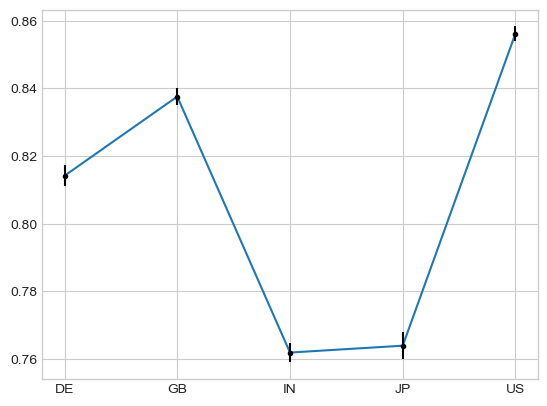

In [1018]:
fig = plt.figure()
ax = plt.axes()
ad_recs_with_rates_per_region2 = ad_recs_with_rates_per_region.reset_index()
ax.plot( ad_recs_with_rates_per_region2.region,ad_recs_with_rates_per_region2.success_rate);
plt.errorbar(ad_recs_with_rates_per_region2.region, ad_recs_with_rates_per_region2.success_rate, yerr=ad_recs_with_rates_per_region2.success_rate_ci95_high - ad_recs_with_rates_per_region2.success_rate, fmt='.k');
ad_recs_with_rates_per_region2

In [980]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

###### 23.  Present WoW table/graph with success rate and CI (see image below) per region and rec type

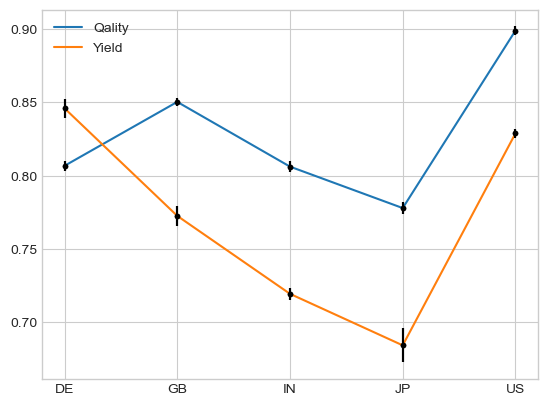

In [1097]:
fig = plt.figure()

ad_recs_per_recommendation_type_region2 = ad_recs_per_recommendation_type_region.reset_index()

for rec in ad_recs_per_recommendation_type_region2.recommendation_type.unique():
    by_recommendation = ad_recs_per_recommendation_type_region2[ad_recs_per_recommendation_type_region2["recommendation_type"] == rec];
    plt.plot(by_recommendation.region, by_recommendation.success_rate, label = rec);
    plt.legend()
    plt.errorbar(ad_recs_per_recommendation_type_region2.region, ad_recs_per_recommendation_type_region2.success_rate, yerr=ad_recs_per_recommendation_type_region2.success_rate_ci95_high - ad_recs_per_recommendation_type_region2.success_rate, fmt='.k');


###### 24.  Present WoW table/graph with success rate and CI (see image below) per region and rec provider

                       sever_rate  sever_rate_ci95_high  sever_rate_ci95_lo  \
rec_provider region                                                           
BooksQ       DE     0    0.095941              0.131071            0.060811   
             US     0    0.200000              0.461333           -0.061333   
BooksY       DE     0    0.238095              0.368469            0.107722   
             US     0    0.285714              0.423996            0.147432   
DNNQ         DE     0    0.763410              0.774940            0.751880   

                       success_rate  success_rate_ci95_high  \
rec_provider region                                           
BooksQ       DE     0      0.799704                0.821038   
             US     0      0.972752                0.989432   
BooksY       DE     0      0.966587                0.976526   
             US     0      0.985482                0.989842   
DNNQ         DE     0      0.839114                0.843113   

    

Text(0, 0.5, 'Success rate')

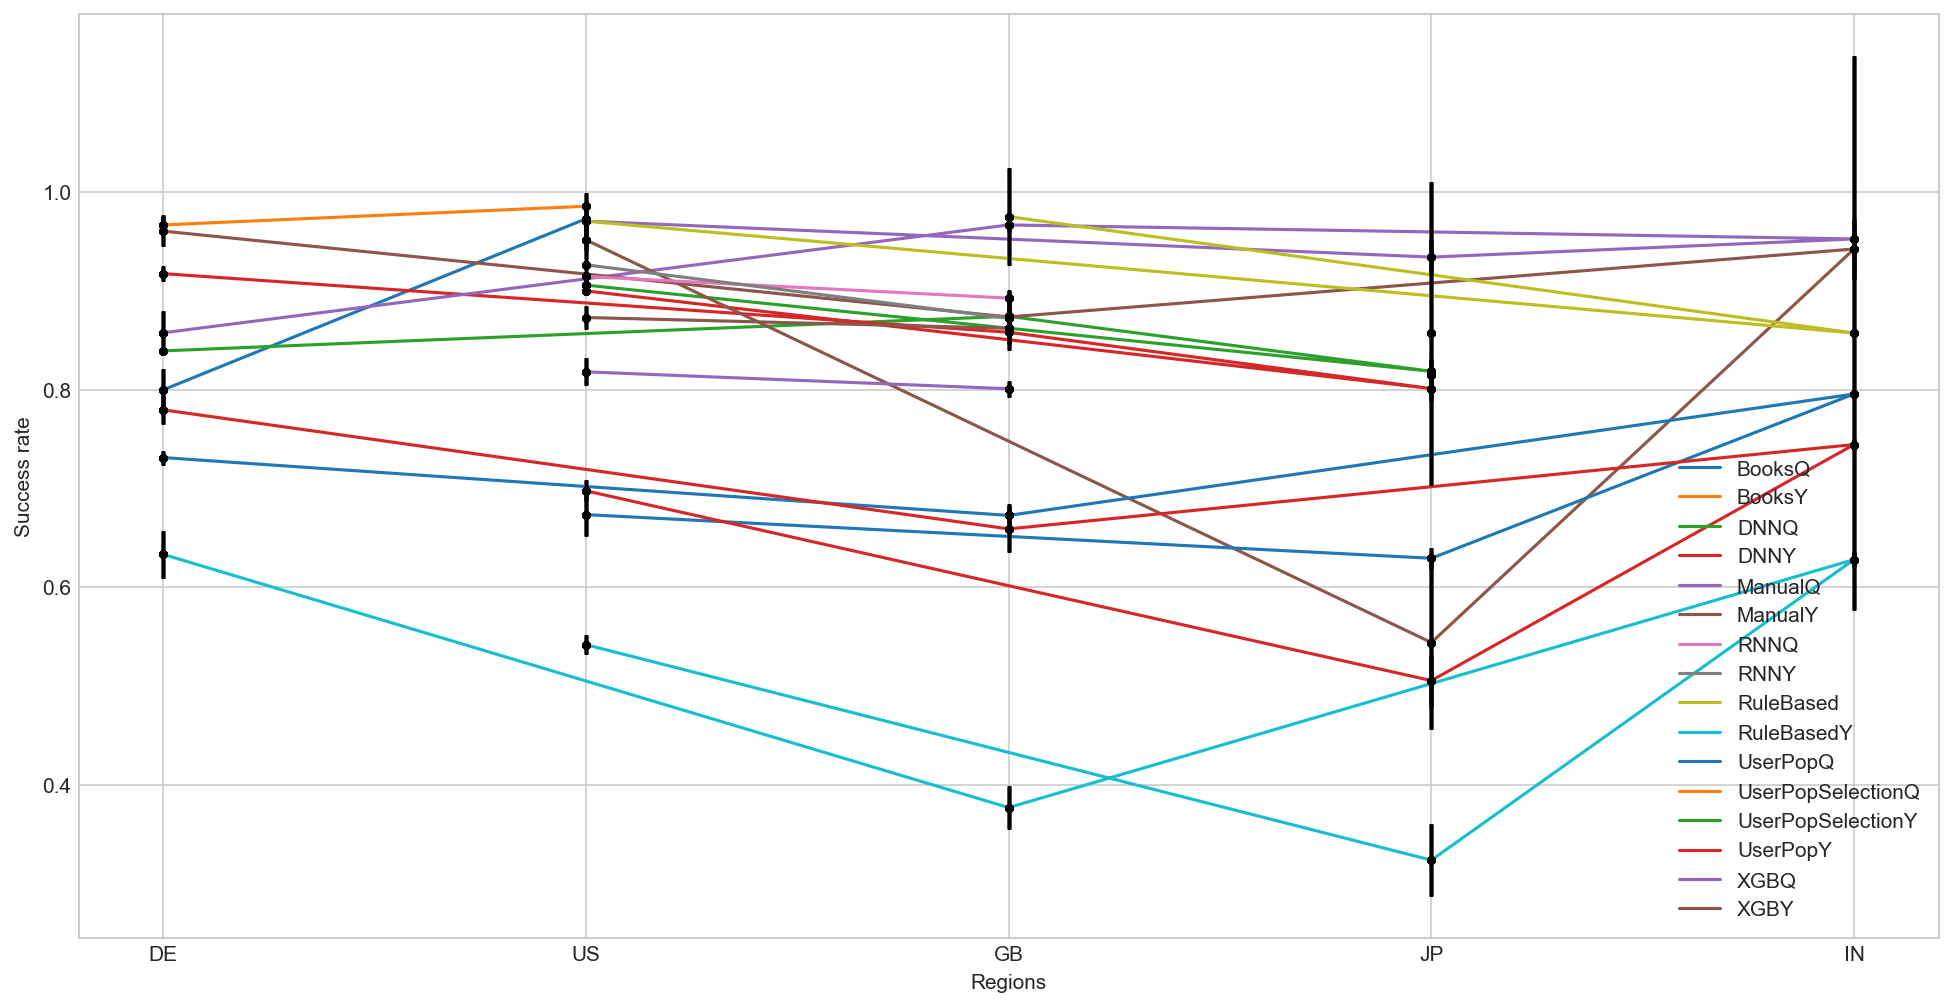

In [1120]:
print(ad_recs_with_rates_per_region_provider.head())
ad_recs_with_rates_per_region_provider2 = ad_recs_with_rates_per_region_provider.reset_index()
fig = plt.figure(figsize=(16, 8), dpi=150)
ax = plt.axes()
for provider in ad_recs_with_rates_per_region_provider2.rec_provider.unique():
    by_provider = ad_recs_with_rates_per_region_provider2[ad_recs_with_rates_per_region_provider2["rec_provider"] == provider];
    plt.plot(by_provider.region, by_provider.success_rate, label = provider);
    plt.legend()
    plt.errorbar(ad_recs_with_rates_per_region_provider2.region, ad_recs_with_rates_per_region_provider2.success_rate, yerr=ad_recs_with_rates_per_region_provider2.success_rate_ci95_high - ad_recs_with_rates_per_region_provider2.success_rate, fmt='.k');

plt.xlabel('Regions')
plt.ylabel('Success rate')

Analysis Bonus questions:
1. Compute the per region success rate and CI in trailing weeks, Say, 4 weeks instead of 1 week - to allow for smoother estimations and smaller CIs

### Compactization

* Are there duplicated ads? To compac the data, remove duplicated ads and instead add an ad_count column **(pay attention, this is not trivial at all)**

### Merges and joins

The Wow samples and annotations task were sent and recieve seperatly, per each week. The dataset you were working on was constructed from those files. You can see the files under the `data/weekly` folder, here are the first 10 files:

In [4]:
import os
weekly_files = os.listdir('data/weekly/')
sorted(weekly_files)[:10]

['2021_33_DE_Qality_annotation_result.csv',
 '2021_33_DE_Yield_annotation_result.csv',
 '2021_33_DE__Sample.csv',
 '2021_33_GB_Qality_annotation_result.csv',
 '2021_33_GB_Yield_annotation_result.csv',
 '2021_33_GB__Sample.csv',
 '2021_33_IN_Qality_annotation_result.csv',
 '2021_33_IN_Yield_annotation_result.csv',
 '2021_33_IN__Sample.csv',
 '2021_33_JP_Qality_annotation_result.csv']

Your task is to reconstruct the dataset above. 

### Visualizations

Produce the following success rate graph per region:

Text(0.5, 1.0, 'Success rate per region')

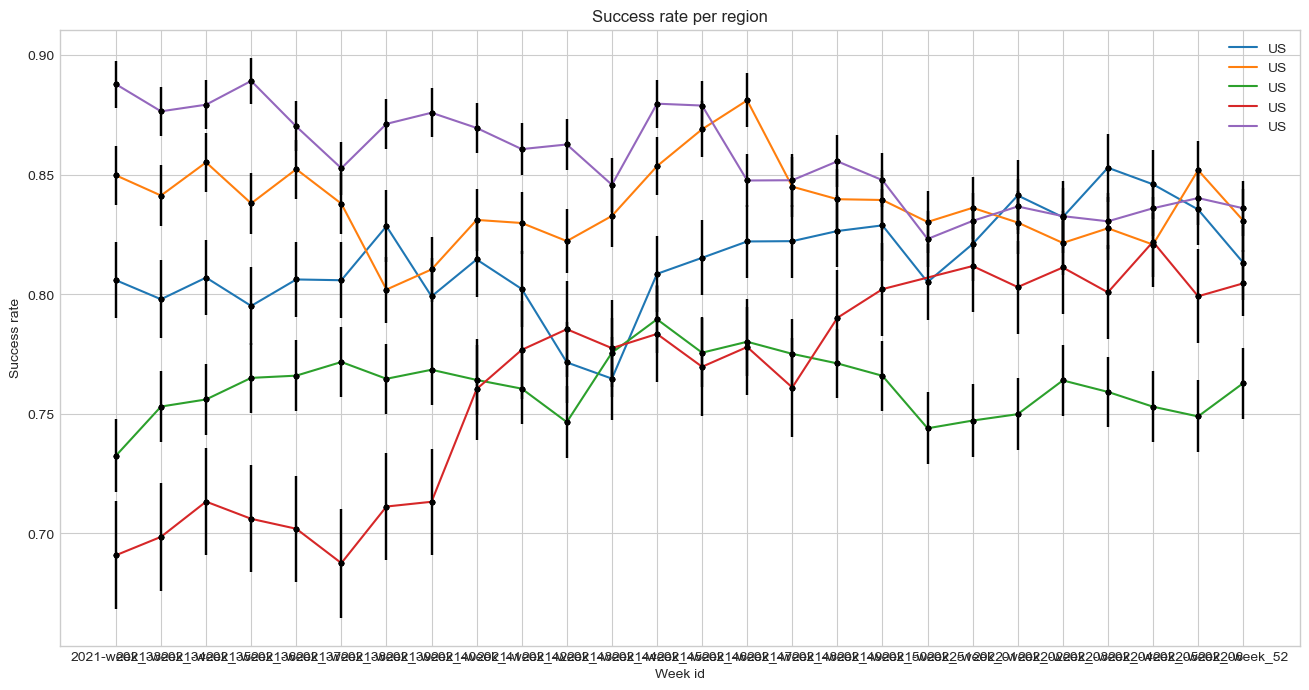

In [1131]:

ad_recs_with_rates_per_region_week = ad_recs_annotated.groupby(["week_id", "region"]).apply(calc_success_and_sever_rate)

ad_recs_with_rates_per_region_week = ad_recs_with_rates_per_region_week.reset_index()
fig = plt.figure(figsize=(16, 8), dpi=100)
ax = plt.axes()
for region in ad_recs_with_rates_per_region_week.region.unique():
    by_week = ad_recs_with_rates_per_region_week[ad_recs_with_rates_per_region_week["region"] == region];
    plt.plot(by_week.week_id, by_week.success_rate, label = week);
    plt.legend()
    plt.errorbar(ad_recs_with_rates_per_region_week.week_id, ad_recs_with_rates_per_region_week.success_rate, yerr=ad_recs_with_rates_per_region_week.success_rate_ci95_high - ad_recs_with_rates_per_region_week.success_rate, fmt='.k');

plt.xlabel('Week id')
plt.ylabel('Success rate')
plt.title('Success rate per region')





Produce the following requestser proportion graph:

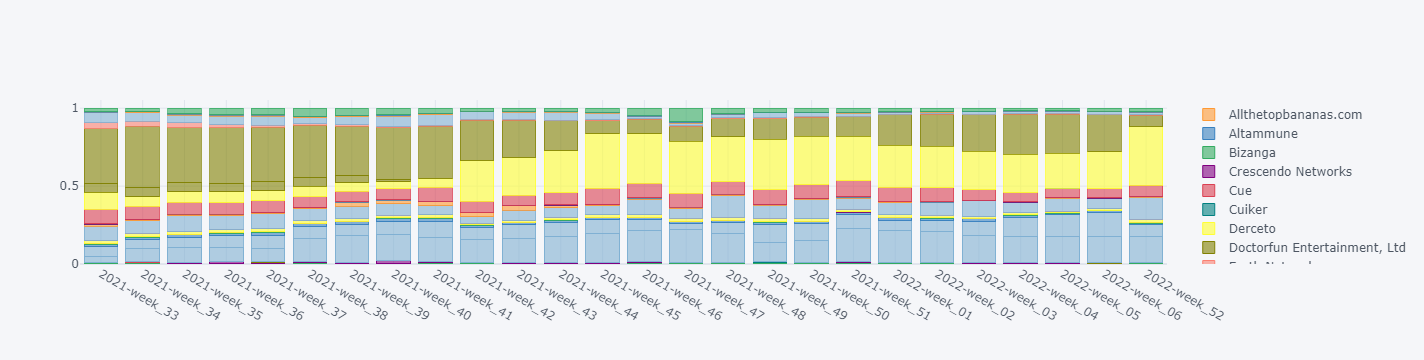

## Appendix

Code to create weekly files:

In [67]:
# for l in ad_recs_annotated.region.unique():
#     for w in ad_recs_annotated.week_id.unique():
#         w_id = w.split('_')[1]
#         y = w.split('-')[0]
#         query = f'week_id == "{w}" and region == "{l}"'
#         sample_f_name = f'{y}_{w_id}_{l}__Sample.csv'
#         ad_recs_annotated.query(query)[['week_id','ad_id','requester','region','recommendation_type', 'rec_provider']].to_csv(f'data/weekly/{sample_f_name}', index=False)
#         for s in ad_recs_annotated.recommendation_type.unique():
#             ann_f_name = f'{y}_{w_id}_{l}_{s}_annotation_result.csv'
#             query = f'week_id == "{w}" and region == "{l}" and recommendation_type == "{s}"'
#             sss = ad_recs_annotated.query(query)
#             if sss.empty:
#                 continue            
#             sss[['region','ad_id','is_success','is_sever']].drop_duplicates(subset=['ad_id']).to_csv(f'data/weekly/{ann_f_name}', index=False)